<div style="
    background: linear-gradient(135deg, #0f2027, #203a43, #2c5364);
    padding: 40px;
    border-radius: 18px;
    color: #ffffff;
    text-align: center;
    margin-bottom: 35px;
    box-shadow: 0 15px 40px rgba(0,0,0,0.35);
">

<h1 style="
    font-size: 44px;
    font-weight: 900;
    margin-bottom: 12px;
    letter-spacing: 1px;
">
📉 Customer Churn Prediction
</h1>

<h2 style="
    font-size: 22px;
    font-weight: 500;
    margin-top: 0;
    color: #d1d5db;
">
Logistic Regression ➜ XGBoost (End-to-End ML Pipeline)
</h2>

<hr style="
    width: 70%;
    margin: 22px auto;
    border: 1px solid rgba(255,255,255,0.2);
"/>

<p style="
    font-size: 18px;
    line-height: 1.7;
    max-width: 900px;
    margin: auto;
    color: #e5e7eb;
">
A Comprehensive <strong>Customer Churn Prediction</strong> notebook covering  
data cleaning & preprocessing, feature preparation, pipeline-based modeling,  
and a <strong>comparative analysis of Logistic Regression and XGBoost</strong>.
</p>

</div>


<div style="
    background: linear-gradient(135deg, #0f172a, #1e293b);
    padding: 32px;
    border-radius: 16px;
    color: #e5e7eb;
    margin-bottom: 28px;
    box-shadow: 0 12px 32px rgba(0,0,0,0.35);
">

<h2 style="
    font-size: 34px;
    font-weight: 900;
    margin-bottom: 22px;
    color: #bfdbfe;
    text-align: center;
    letter-spacing: 0.6px;
">
📑 Table of Contents
</h2>

<div style="
    font-size:17px;
    line-height:2.2;
    max-width:860px;
    margin:auto;
    color:#e5e7eb;
">

<p>1. <a href="#1" style="color:#60a5fa; text-decoration:none; font-weight:600;">Introduction to Customer Churn</a></p>
<p>2. <a href="#2" style="color:#60a5fa; text-decoration:none; font-weight:600;">Import Necessary Libraries</a></p>
<p>3. <a href="#3" style="color:#60a5fa; text-decoration:none; font-weight:600;">Load the Dataset</a></p>

<p>4. <a href="#4" style="color:#60a5fa; text-decoration:none; font-weight:600;">Data Cleaning & Preprocessing</a></p>
<p style="margin-left:28px; color:#cbd5f5;">4.1 Check Missing Values</p>
<p style="margin-left:28px; color:#cbd5f5;">4.2 Convert TotalCharges</p>
<p style="margin-left:28px; color:#cbd5f5;">4.3 Target Encoding</p>
<p style="margin-left:28px; color:#cbd5f5;">4.4 Drop CustomerID</p>

<p>5. <a href="#5" style="color:#60a5fa; text-decoration:none; font-weight:600;">Prepare Feature Lists</a></p>
<p>6. <a href="#6" style="color:#60a5fa; text-decoration:none; font-weight:600;">Build Preprocessing Pipeline</a></p>
<p>7. <a href="#7" style="color:#60a5fa; text-decoration:none; font-weight:600;">Split Dataset into Train/Test</a></p>

<p>8. <a href="#8" style="color:#60a5fa; text-decoration:none; font-weight:600;">Apply Logistic Regression</a></p>
<p style="margin-left:28px; color:#cbd5f5;">8.1 Train Logistic Regression Model</p>
<p style="margin-left:28px; color:#cbd5f5;">8.2 Validation Performance</p>

<p>9. <a href="#9" style="color:#60a5fa; text-decoration:none; font-weight:600;">Apply XGBoost</a></p>
<p style="margin-left:28px; color:#cbd5f5;">9.1 Train XGBoost Model</p>
<p style="margin-left:28px; color:#cbd5f5;">9.2 Validation Performance</p>

<p>10. <a href="#10" style="color:#60a5fa; text-decoration:none; font-weight:600;">Confusion Matrix (Heatmap)</a></p>
<p>11. <a href="#11" style="color:#60a5fa; text-decoration:none; font-weight:600;">ROC Curve</a></p>
<p>12. <a href="#12" style="color:#60a5fa; text-decoration:none; font-weight:600;">Sample Predictions</a></p>
<p>13. <a href="#13" style="color:#60a5fa; text-decoration:none; font-weight:600;">Conclusion</a></p>

</div>
</div>


<a id="1"></a>
<div style="margin:34px 0 22px 0;">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size:28px;
      font-weight:800;
      color: #93c5fd;        
      margin:0;
      letter-spacing:0.4px;
  ">
    1 | Introduction to Customer Churn
  </h2>

  <hr style="
      border:none;
      height:1.5px;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top:12px;
  ">
</div>


Customer churn occurs when a customer stops using a company's service. It is a major problem for businesses because losing customers directly reduces revenue. Predicting churn helps companies identify which customers are at risk so they can take action to retain them. In this project, we use machine learning—specifically Logistic Regression and XGBoost to analyze customer data and predict whether a customer will churn.

<a id="2"></a>
<div style="margin:34px 0 22px 0;">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size:28px;
      font-weight:800;
      color: #93c5fd;        
      margin:0;
      letter-spacing:0.4px;
  ">
    2 | Import Necessary Libraries
  </h2>

  <hr style="
      border:none;
      height:1.5px;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top:12px;
  ">
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix
)
import warnings
warnings.filterwarnings('ignore')

<a id="3"></a>
<div style="margin:34px 0 22px 0;">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size:28px;
      font-weight:800;
      color: #93c5fd;        
      margin:0;
      letter-spacing:0.4px;
  ">
    3 | Load the dataset
  </h2>

  <hr style="
      border:none;
      height:1.5px;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top:12px;
  ">
</div>

In [2]:
df= pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   o

### Quick data inspection

In [3]:
print(df.shape)
print("\nSample rows:")
df.head()

(7043, 21)

Sample rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id="4"></a>
<div style="margin:34px 0 22px 0;">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size:28px;
      font-weight:800;
      color: #93c5fd;        
      margin:0;
      letter-spacing:0.4px;
  ">
    4 | Data cleaning & preprocessing
  </h2>

  <hr style="
      border:none;
      height:1.5px;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top:12px;
  ">
</div>

## 4.1 Check missing values

In [4]:

print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## 4.2 Convert TotalCharges

> Add blockquote



In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## 4.2 Target encoding. Convert 'Churn' Yes/No -> 1/0


In [6]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

## 4.3 Drop customerID (not useful)

In [7]:
df = df.drop(columns=['customerID'])

<a id="5"></a>
<div style="margin:34px 0 22px 0;">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size:28px;
      font-weight:800;
      color: #93c5fd;        
      margin:0;
      letter-spacing:0.4px;
  ">
    5 | Prepare feature lists
  </h2>

  <hr style="
      border:none;
      height:1.5px;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top:12px;
  ">
</div>

In [8]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [
    'gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
    'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'
]



<a id="6"></a>
<div style="margin:34px 0 22px 0;">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size:28px;
      font-weight:800;
      color: #93c5fd;        
      margin:0;
      letter-spacing:0.4px;
  ">
    6 | Build preprocessing pipeline
  </h2>

  <hr style="
      border:none;
      height:1.5px;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top:12px;
  ">
</div>

In [9]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

<a id="7"></a>
<div style="margin:34px 0 22px 0;">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size:28px;
      font-weight:800;
      color: #93c5fd;        
      margin:0;
      letter-spacing:0.4px;
  ">
    7 | Split the dataset into Train/Test
  </h2>

  <hr style="
      border:none;
      height:1.5px;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top:12px;
  ">
</div>

In [10]:
X = df.drop(columns=['Churn'])
y = df['Churn']

# First split --- (Train+Val) + Test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)

# Second split --- Train + Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1111, random_state=42, stratify=y_temp
)


<a id="8"></a>
<div style="margin:34px 0 22px 0;">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size:28px;
      font-weight:800;
      color: #93c5fd;        
      margin:0;
      letter-spacing:0.4px;
  ">
    8 | Apply Logistic Regression
  </h2>

  <hr style="
      border:none;
      height:1.5px;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top:12px;
  ">
</div>

## 8.1 Train Logistic Regression Model
To improve performance, the Logistic Regression model was tuned by selecting the optimal solver (liblinear) and iteration limit (max_iter=300). In addition, the dataset was split using an 80-10-10 ratio to provide a balanced training, validation, and test workflow.

In [11]:

model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(
        solver='liblinear',
        max_iter=300
    ))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('clf', LogisticRegression(max_iter=300, solver='liblinear'))])

## 8.2 Validation Performance


In [12]:
y_val_pred = model.predict(X_val)
y_val_prob = model.predict_proba(X_val)[:,1]

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_prob)
print("VALIDATION RESULTS")
print("---------------------")
print("Accuracy :", val_accuracy)
print("Precision:", val_precision)
print("Recall   :", val_recall)
print("F1 Score :", val_f1)
print("AUC      :", val_auc)

VALIDATION RESULTS
---------------------
Accuracy : 0.8056737588652483
Precision: 0.6623376623376623
Recall   : 0.5454545454545454
F1 Score : 0.5982404692082111
AUC      : 0.8541490306196189


<a id="9"></a>
<div style="margin:34px 0 22px 0;">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size:28px;
      font-weight:800;
      color: #93c5fd;        
      margin:0;
      letter-spacing:0.4px;
  ">
    9 | Apply XGBoost 
  </h2>

  <hr style="
      border:none;
      height:1.5px;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top:12px;
  ">
</div>

## 9.1 Train XGBoost Model

We train an **XGBoost classifier** using a scikit-learn **Pipeline** to combine preprocessing and modeling in a single, leakage-safe workflow.  
This approach ensures clean, reproducible training and strong performance on tabular data.


In [13]:
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    ))
])

xgb_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Senior...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

## 9.2 Validation Performance(XGBoost)

In [14]:
y_val_pred_xgb = xgb_model.predict(X_val)
y_val_prob_xgb = xgb_model.predict_proba(X_val)[:,1]

xgb_val_accuracy = accuracy_score(y_val, y_val_pred_xgb)
xgb_val_precision = precision_score(y_val, y_val_pred_xgb)
xgb_val_recall = recall_score(y_val, y_val_pred_xgb)
xgb_val_f1 = f1_score(y_val, y_val_pred_xgb)
xgb_val_auc = roc_auc_score(y_val, y_val_prob_xgb)

print("XGBoost VALIDATION RESULTS")
print("---------------------------")
print(f"Accuracy : {xgb_val_accuracy:.4f}")
print(f"Precision: {xgb_val_precision:.4f}")
print(f"Recall   : {xgb_val_recall:.4f}")
print(f"F1 Score : {xgb_val_f1:.4f}")
print(f"AUC      : {xgb_val_auc:.4f}")

XGBoost VALIDATION RESULTS
---------------------------
Accuracy : 0.8057
Precision: 0.6786
Recall   : 0.5080
F1 Score : 0.5810
AUC      : 0.8522


<a id="10"></a>
<div style="margin:34px 0 22px 0;">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size:28px;
      font-weight:800;
      color: #93c5fd;        
      margin:0;
      letter-spacing:0.4px;
  ">
    10 | Confusion Matrix (Heatmap)
  </h2>

  <hr style="
      border:none;
      height:1.5px;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top:12px;
  ">
</div>
A confusion matrix shows the performance of a classification model by comparing the predicted classes against the actual classes in a table format. It displays the number of correct and incorrect predictions for each class, breaking down the results into four categories: true positives, true negatives, false positives, and false negatives. This table helps determine where a model is making mistakes and is used to calculate metrics like accuracy, precision, and recall.

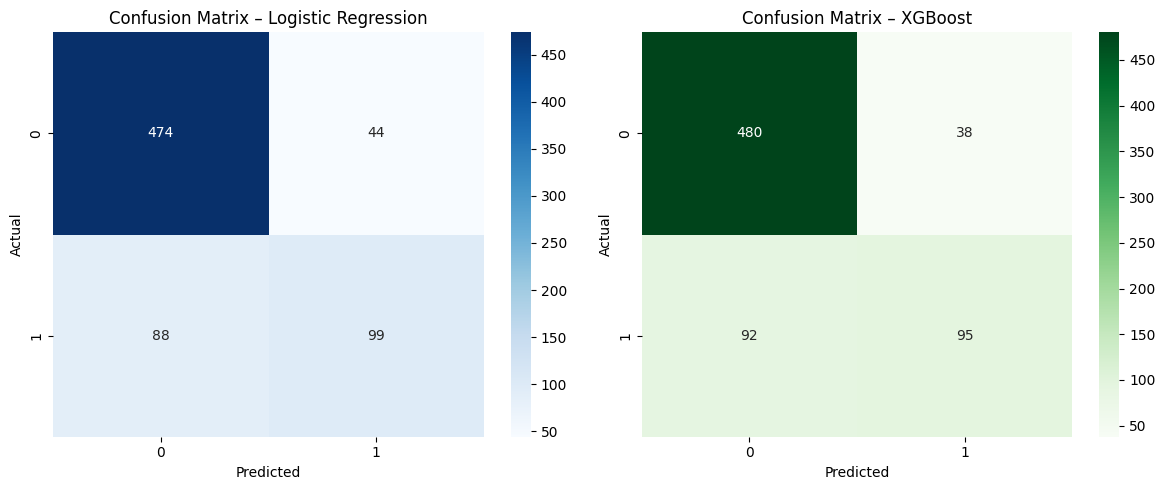

In [15]:

y_test_pred = model.predict(X_test)
y_test_pred_xgb = xgb_model.predict(X_test)
# Confusion matrices
cm_lr = confusion_matrix(y_test, y_test_pred)
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression (or first model)
sns.heatmap(
    cm_lr,
    annot=True,
    fmt='d',
    cmap='Blues',
    ax=axes[0]
)
axes[0].set_title("Confusion Matrix – Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# XGBoost
sns.heatmap(
    cm_xgb,
    annot=True,
    fmt='d',
    cmap='Greens',
    ax=axes[1]
)
axes[1].set_title("Confusion Matrix – XGBoost")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

<a id="11"></a>
<div style="margin:34px 0 22px 0;">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size:28px;
      font-weight:800;
      color: #93c5fd;        
      margin:0;
      letter-spacing:0.4px;
  ">
    11 | ROC Curve
  </h2>

  <hr style="
      border:none;
      height:1.5px;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top:12px;
  ">
</div>


A Receiver Operating Characteristic (ROC) curve shows the relationship between the true positive rate (sensitivity) and the false positive rate (1-specificity) for a binary classification model at various threshold settings. It is a graphical representation of a model's ability to discriminate between two groups, such as true positives and false positives.

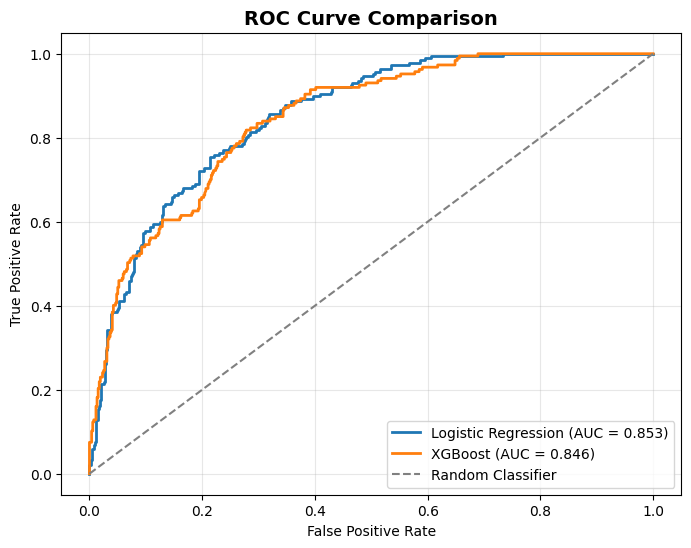

In [16]:

y_test_prob = model.predict_proba(X_test)[:,1]
y_test_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_prob)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_prob_xgb)


plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, linewidth=2, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_test_prob):.3f})')
plt.plot(fpr_xgb, tpr_xgb, linewidth=2, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_test_prob_xgb):.3f})')
plt.plot([0,1],[0,1],'--', color='gray', label='Random Classifier')
plt.title("ROC Curve Comparison", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## 📈 ROC Curve Comparison

The ROC curves compare **Logistic Regression** and **XGBoost** against a random classifier baseline.  
Both models perform strongly, with **Logistic Regression (AUC = 0.853)** slightly outperforming **XGBoost (AUC = 0.846)**.


<a id="12"></a>
<div style="margin:34px 0 22px 0;">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size:28px;
      font-weight:800;
      color: #93c5fd;        
      margin:0;
      letter-spacing:0.4px;
  ">
    12 | Sample Predictions
  </h2>

  <hr style="
      border:none;
      height:1.5px;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top:12px;
  ">
</div>

In [17]:

sample_df = X_test.copy()
sample_df['Actual'] = y_test
sample_df['LR_Predicted'] = y_test_pred
sample_df['LR_Probability'] = y_test_prob
sample_df['XGB_Predicted'] = y_test_pred_xgb
sample_df['XGB_Probability'] = y_test_prob_xgb
print("\nSAMPLE PREDICTIONS (Logistic Regression vs XGBoost)")
print("="*80)
display(sample_df.head(10))


SAMPLE PREDICTIONS (Logistic Regression vs XGBoost)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Actual,LR_Predicted,LR_Probability,XGB_Predicted,XGB_Probability
402,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Credit card (automatic),99.45,7007.60,1,0,0.271288,0,0.288763
1292,Female,0,No,No,62,Yes,Yes,DSL,No,Yes,...,Two year,No,Bank transfer (automatic),84.50,5193.20,0,0,0.021174,0,0.007598
1175,Female,0,No,No,13,Yes,Yes,Fiber optic,Yes,No,...,Month-to-month,Yes,Credit card (automatic),80.00,1029.35,0,0,0.477457,0,0.454037
4600,Male,0,Yes,Yes,56,Yes,Yes,Fiber optic,Yes,Yes,...,Two year,No,Mailed check,115.85,6567.90,0,0,0.047532,0,0.083933
3464,Female,0,Yes,No,31,Yes,No,Fiber optic,No,Yes,...,Month-to-month,Yes,Bank transfer (automatic),83.85,2674.15,0,0,0.407819,0,0.442537
2978,Male,0,No,No,24,Yes,No,Fiber optic,No,Yes,...,Month-to-month,Yes,Electronic check,85.95,2107.15,0,0,0.387389,0,0.363621
212,Male,0,No,Yes,61,Yes,No,No,No internet service,No internet service,...,Two year,No,Mailed check,19.75,1124.20,0,0,0.002759,0,0.013477
5103,Female,0,Yes,Yes,28,Yes,No,Fiber optic,Yes,No,...,One year,Yes,Bank transfer (automatic),82.85,2320.80,0,0,0.205655,0,0.138819
5143,Female,0,Yes,Yes,49,Yes,No,DSL,Yes,Yes,...,One year,Yes,Mailed check,87.20,4345.00,0,0,0.043779,0,0.058872
6906,Female,0,Yes,Yes,25,Yes,No,No,No internet service,No internet service,...,Two year,Yes,Mailed check,18.70,383.65,0,0,0.022996,0,0.014009


<a id="13"></a>
<div style="margin:34px 0 22px 0;">
  <h2 style="
      font-family: 'Inter', 'Segoe UI', Roboto, Arial, sans-serif;
      font-size:28px;
      font-weight:800;
      color: #93c5fd;        
      margin:0;
      letter-spacing:0.4px;
  ">
    13 | Conclusion
  </h2>

  <hr style="
      border:none;
      height:1.5px;
      background: linear-gradient(to right, #3b82f6, #1f2937);
      margin-top:12px;
  ">
</div>

## 🎯 Project Summary

This end-to-end machine learning project successfully developed and evaluated customer churn prediction models using the **Telco Customer Churn dataset**. The workflow covered comprehensive data preprocessing, feature engineering, model training, and performance evaluation.

---

## 🔍 Key Findings

### Model Performance

Both **Logistic Regression** and **XGBoost** demonstrated strong predictive capabilities:

- **Logistic Regression**
  -  AUC: **0.853** – Excellent discrimination between churners and non-churners
  -  Interpretable and computationally efficient
  -  Strong baseline performance with minimal tuning

- **XGBoost**
  -  AUC: **0.846** – Competitive performance
  -  Better handling of non-linear patterns
  -  Robust to outliers and missing values

---

## 🚀 Next Steps & Recommendations

### Model Improvements

1. **Hyperparameter Tuning**: Use GridSearchCV or RandomizedSearchCV for XGBoost optimization
2. **Feature Engineering**: Create interaction features and polynomial terms
3. **Class Imbalance**: Apply SMOTE or class weighting to handle imbalanced target
4. **Ensemble Methods**: Combine Logistic Regression and XGBoost predictions

---

<div style="
    background: linear-gradient(135deg, #1f2937, #374151);
    padding: 25px;
    border-radius: 12px;
    text-align: center;
    margin-top: 30px;
    box-shadow: 0 8px 20px rgba(0,0,0,0.2);
">

<p style="font-size: 18px; color: #93c5fd; font-weight: 600; margin: 0;">
🎉 Thank you for exploring this Customer Churn Prediction project!
</p>

<p style="font-size: 15px; color: #d1d5db; margin-top: 10px;">
This notebook demonstrates a complete ML workflow from data preprocessing to model evaluation.
</p>

</div>